In [2]:
%matplotlib inline

%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np

import xarray as xr

import regionmask

import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import cartopy.feature as cfeat
import matplotlib.patches as mpatches
import cmocean

import glob


import sys
sys.path.append('../')
import utils
import plotting

np.seterr(invalid='ignore'); # disable a warning from matplotlib and cartopy

In [3]:
ds1= xr.open_dataset('./final_data/ds_PM_O3_daily.nc4')
ds2= xr.open_dataset('./final_data/ds_NOX_SO2_CH2O_daily.nc4')
ds = xr.merge([ds1, ds2])
ds_seasonal = utils.season_mean(ds)
ds_seasonal['O3'].attrs = {'units':'ppb'}
ds_seasonal['PM25'].attrs = {'units':r'$u$g/m3'}

model_names = ds['model_name'].values

https://www.epa.gov/criteria-air-pollutants/naaqs-table

# PM

In [6]:
(ds['PM25'].where(ds['PM25'] >35).count(dim = 'time').sel(model_name = 'nonuc_NA') - 
    ds['PM25'].where(ds['PM25'] >35).count(dim = 'time').sel(model_name = 'normal_NA')).values.sum()

20

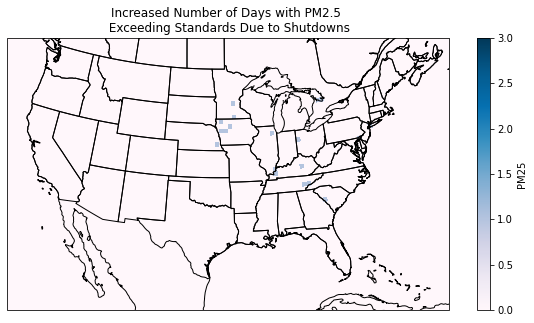

In [13]:
fig, ax = plt.subplots(figsize = (10,5), subplot_kw={'projection':ccrs.LambertConformal()})
(ds['PM25'].where(ds['PM25'] >35).count(dim = 'time').sel(model_name = 'nonuc_NA') - 
    ds['PM25'].where(ds['PM25'] >35).count(dim = 'time').sel(model_name = 'normal_NA')).plot(ax = ax, cmap = 'PuBu', vmin = 0, vmax = 3, transform = ccrs.PlateCarree())
ax.add_feature(cfeat.STATES)
ax.coastlines() #add coastlines
ax.set_extent([-120,-70,20,50]) #set a limit on the plot lat and lon
plt.title('Increased Number of Days with PM2.5 \n Exceeding Standards Due to Shutdowns');

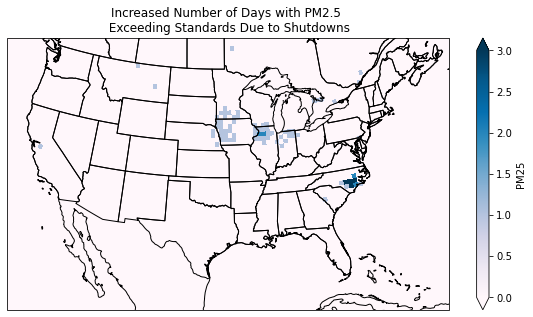

In [14]:
fig, ax = plt.subplots(figsize = (10,5), subplot_kw={'projection':ccrs.LambertConformal()})
(ds['PM25'].where(ds['PM25'] >35).count(dim = 'time').sel(model_name = 'nonuc_coal_NA') - 
    ds['PM25'].where(ds['PM25'] >35).count(dim = 'time').sel(model_name = 'normal_NA')).plot(ax = ax, cmap = 'PuBu', vmin = 0, vmax = 3, transform = ccrs.PlateCarree())
ax.add_feature(cfeat.STATES)
ax.coastlines() #add coastlines
ax.set_extent([-120,-70,20,50]) #set a limit on the plot lat and lon
plt.title('Increased Number of Days with PM2.5 \n Exceeding Standards Due to Shutdowns');

# NOx

In [65]:
ds['NOx'].mean(dim = 'time').sel(model_name = 'nonuc_NA').max()

<xarray.DataArray 'NOx' ()>
array(14.87023067)
Coordinates:
    lev         float64 0.9925
    model_name  <U8 'nonuc_NA'

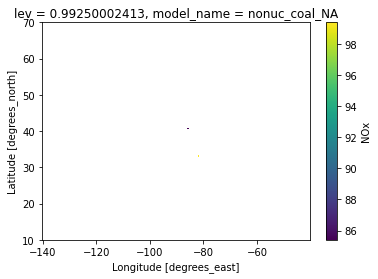

In [74]:
ds['NOx'].mean(dim = 'time').sel(model_name = 'nonuc_coal_NA').where(ds['NOx'].mean(dim = 'time').sel(model_name = 'nonuc_coal_NA') > 53).plot()

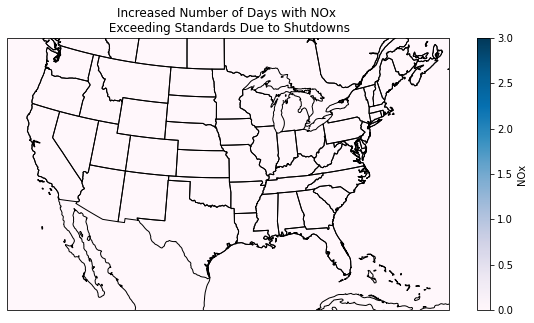

In [18]:
fig, ax = plt.subplots(figsize = (10,5), subplot_kw={'projection':ccrs.LambertConformal()})
(ds['NOx'].where(ds['NOx'] >53).count(dim = 'time').sel(model_name = 'nonuc_NA') - 
    ds['NOx'].where(ds['NOx'] >53).count(dim = 'time').sel(model_name = 'normal_NA')).plot(ax = ax, cmap = 'PuBu', vmin = 0, vmax = 3, transform = ccrs.PlateCarree())
ax.add_feature(cfeat.STATES)
ax.coastlines() #add coastlines
ax.set_extent([-120,-70,20,50]) #set a limit on the plot lat and lon
plt.title('Increased Number of Days with NOx \n Exceeding Standards Due to Shutdowns');

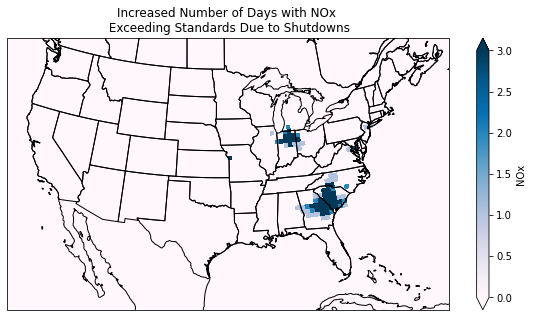

In [62]:
fig, ax = plt.subplots(figsize = (10,5), subplot_kw={'projection':ccrs.LambertConformal()})
(ds['NOx'].where(ds['NOx'] >53).count(dim = 'time').sel(model_name = 'nonuc_coal_NA') - 
    ds['NOx'].where(ds['NOx'] >53).count(dim = 'time').sel(model_name = 'normal_NA')).plot(ax = ax, cmap = 'PuBu', vmin = 0, vmax = 3, transform = ccrs.PlateCarree())
ax.add_feature(cfeat.STATES)
ax.coastlines() #add coastlines
ax.set_extent([-120,-70,20,50]) #set a limit on the plot lat and lon
plt.title('Increased Number of Days with NOx \n Exceeding Standards Due to Shutdowns');

# O3

In [28]:
all_paths = ['nei_NA', 'normal_NA', 'nonuc_NA', 'nonuc_coal_NA', 'egrid_NA','epa_NA']
ds_import = {}
for path in all_paths:
    ds_import[path] = xr.open_dataset(f'/net/fs11/d0/emfreese/GCrundirs/nuclearproj/{path}/merged_data/merged_O3_JJA_hourly.nc4')
    
dsO3_hrly = xr.concat([ds_import[path] for path in all_paths], 
                      pd.Index(all_paths, name='model_name'))


In [33]:
ds_reduced_o3 = dsO3_hrly.sel(time = dsO3_hrly.time.dt.hour.isin([np.arange(10,18)])).isel(lev = 0)

In [43]:
ds_reduced_o3['SpeciesConc_O3']*=1e9

In [60]:
ds_reduced_o3['SpeciesConc_O3'].mean(dim = 'time').sel(model_name = 'nonuc_coal_NA').max()

<xarray.DataArray 'SpeciesConc_O3' ()>
array(55.97520828)
Coordinates:
    lev         float64 0.9925
    model_name  <U13 'nonuc_coal_NA'

In [61]:
ds_reduced_o3['SpeciesConc_O3'].mean(dim = 'time').sel(model_name = 'nonuc_NA').max()

<xarray.DataArray 'SpeciesConc_O3' ()>
array(55.520504)
Coordinates:
    lev         float64 0.9925
    model_name  <U8 'nonuc_NA'